In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/df_rfm_model.csv', index_col=0)

df.head()

,Recency,Frequency,MonetaryValue,Country
Customer_ID,,,,
12347,2,8,4620.32,Iceland
12348,75,5,1658.40,Finland
12349,19,3,3319.06,Italy
12350,310,1,258.00,Norway
12352,36,9,1705.64,Norway


### Cellule 1 : Ajustement du modèle KMeans

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supprimer la colonne 'Country'
df = df.drop('Country', axis=1)

###
# Sélectionner uniquement les colonnes numériques
df_numerique = df[['Recency', 'Frequency', 'MonetaryValue']]

# Normaliser les données
normalisateur = StandardScaler()
df_normalise = normalisateur.fit_transform(df_numerique)

# Ajuster le modèle KMeans avec les données normalisées
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Vous pouvez changer le nombre de clusters
kmeans.fit(df_normalise)

# Ajouter les étiquettes de cluster pour chaque point de données au dataframe
df['Cluster'] = kmeans.labels_

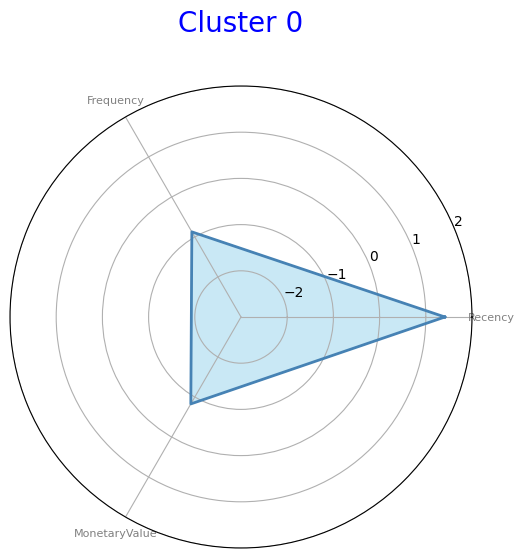

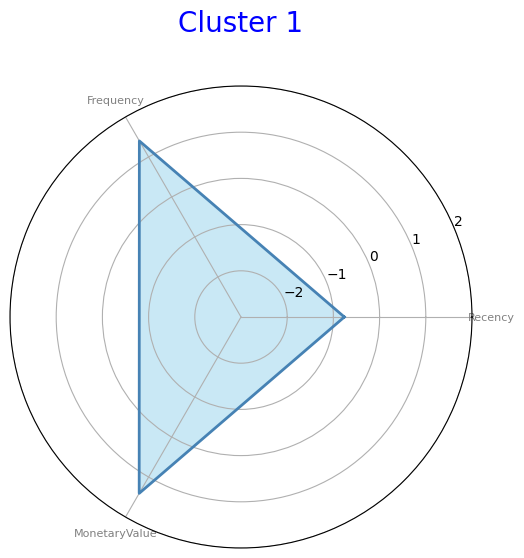

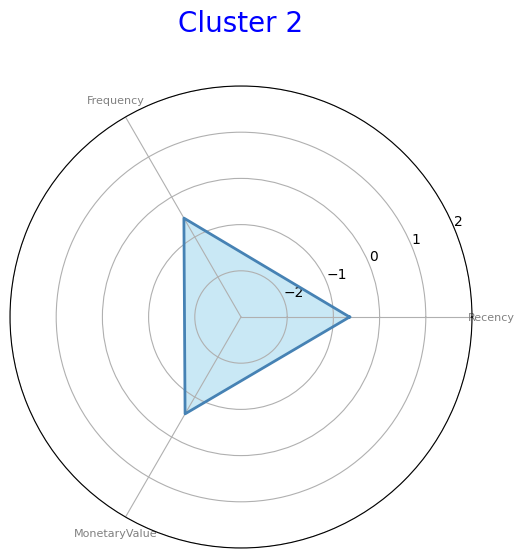

In [4]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Calculate average RFM values for each cluster
cluster_avg = df.groupby('Cluster').mean().reset_index()

# Normalize the cluster averages
scaler = StandardScaler()
cluster_avg_normalized = scaler.fit_transform(cluster_avg.drop('Cluster', axis=1))

# Convert back to DataFrame and add the Cluster column back
cluster_avg_normalized = pd.DataFrame(cluster_avg_normalized, columns=cluster_avg.columns[1:])
cluster_avg_normalized['Cluster'] = cluster_avg['Cluster']

# Number of variables we're plotting
num_vars = len(cluster_avg.columns) - 1

# Split the circle into even parts and save the angles
# so we know where to put each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end
angles += angles[:1]

# Loop through each cluster
for i, row in cluster_avg_normalized.iterrows():
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], cluster_avg.columns[1:], color='grey', size=8)
    # Values
    values = row.drop('Cluster').values.flatten().tolist()
    values += values[:1]
    
    # Draw filled area
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.plot(angles, values, color='steelblue', linewidth=2)
    
    # Set title
    plt.title('Cluster ' + str(int(row['Cluster'])), size=20, color='blue', y=1.1)
    ax.set_ylim([-3, 2])
    # Show the graph
    plt.show()


In [5]:
cluster_avg_normalized

,Recency,Frequency,MonetaryValue,Cluster
0,1.412689,-0.872289,-0.827881,0
1,-0.763203,1.400164,1.406896,1
2,-0.649486,-0.527876,-0.579014,2


In [6]:
# Describe each cluster
for i in df['Cluster'].unique():
    print(f'Cluster {i}')
    print(df[df['Cluster'] == i].describe())
    print('\n------------------------\n')

Cluster 1
          Recency   Frequency  MonetaryValue  Cluster
count  880.000000  880.000000     880.000000    880.0
mean    56.276136   11.294318    3925.336909      1.0
std     80.155480    3.789809    1586.938294      0.0
min      1.000000    1.000000     862.420000      1.0
25%     11.000000    9.000000    2736.850000      1.0
50%     28.000000   11.000000    3610.685000      1.0
75%     64.250000   13.250000    4779.227500      1.0
max    610.000000   20.000000    8438.340000      1.0

------------------------

Cluster 2
           Recency    Frequency  MonetaryValue  Cluster
count  2565.000000  2565.000000    2565.000000   2565.0
mean     75.165302     3.473294     925.095614      2.0
std      67.294165     2.135377     696.445078      0.0
min       1.000000     1.000000       0.000000      2.0
25%      22.000000     2.000000     373.980000      2.0
50%      53.000000     3.000000     762.070000      2.0
75%     113.000000     5.000000    1320.190000      2.0
max     284.000000 

### Cellule 2 : Application de l'ACP et visualisation des clusters

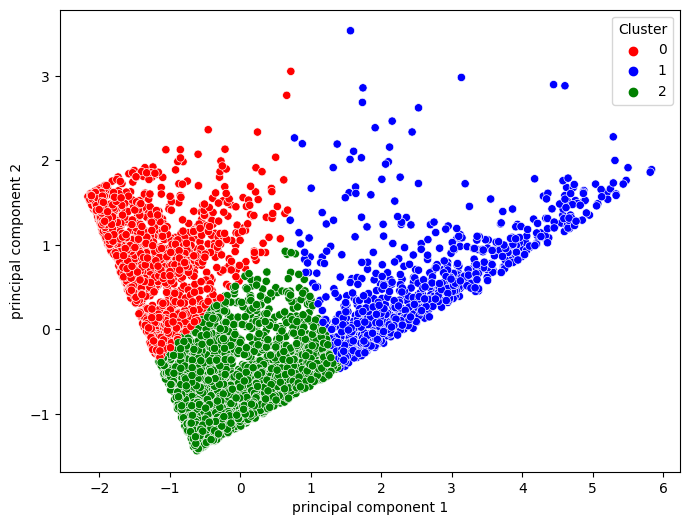

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer l'ACP
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalise)

# Créer un DataFrame avec les composantes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Ajouter les labels de cluster au DataFrame
principalDf['Cluster'] = kmeans.labels_

# Visualiser les clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="principal component 1", y="principal component 2", hue="Cluster", data=principalDf, palette=['red','blue','green'])
plt.show()


In [8]:
df

,Recency,Frequency,MonetaryValue,Cluster
Customer_ID,,,,
12347,2,8,4620.32,1
12348,75,5,1658.40,2
12349,19,3,3319.06,2
12350,310,1,258.00,0
12352,36,9,1705.64,2
...,...,...,...,...
18281,181,2,178.64,2
18282,8,2,178.05,2
18284,432,1,391.28,0


In [9]:
# Group by cluster and calculate average RFM values
cluster_avg = df.groupby('Cluster').mean()

# Print the average values
print(cluster_avg)

            Recency  Frequency  MonetaryValue
Cluster                                      
0        417.707620   2.076196     549.116031
1         56.276136  11.294318    3925.336909
2         75.165302   3.473294     925.095614


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

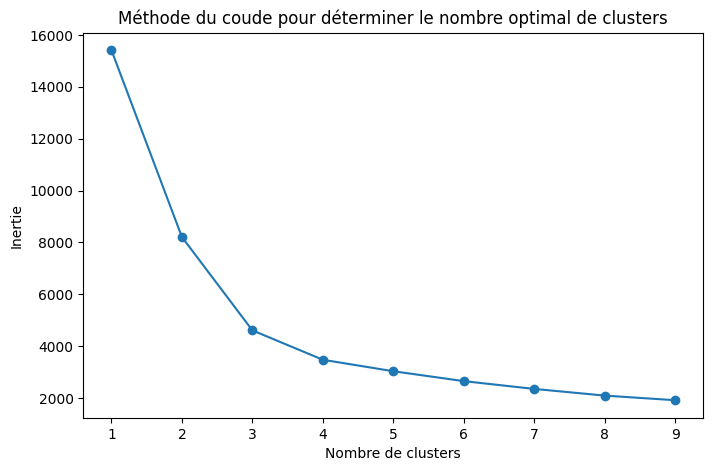

[15414.0,
 8209.117431760764,
 4608.873691703503,
 3475.398452623706,
 3032.6053348194187,
 2651.279871664327,
 2350.4105487683078,
 2093.348040100279,
 1914.5430879422913]

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste pour stocker les valeurs d'inertie pour chaque nombre de clusters
inertias = []

# Boucle sur plusieurs nombres de clusters
for k in range(1, 10):
    # Créer un modèle KMeans avec k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajuster le modèle aux données
    kmeans.fit(df_normalise)
    
    # Ajouter l'inertie du modèle à la liste
    inertias.append(kmeans.inertia_)

# Tracer l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, 'o-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()
inertias

In [11]:
# Describe each cluster
for i in df['Cluster'].unique():
    print(f'Cluster {i}')
    print(df[df['Cluster'] == i].describe())
    print('\n------------------------\n')

Cluster 1
          Recency   Frequency  MonetaryValue  Cluster
count  880.000000  880.000000     880.000000    880.0
mean    56.276136   11.294318    3925.336909      1.0
std     80.155480    3.789809    1586.938294      0.0
min      1.000000    1.000000     862.420000      1.0
25%     11.000000    9.000000    2736.850000      1.0
50%     28.000000   11.000000    3610.685000      1.0
75%     64.250000   13.250000    4779.227500      1.0
max    610.000000   20.000000    8438.340000      1.0

------------------------

Cluster 2
           Recency    Frequency  MonetaryValue  Cluster
count  2565.000000  2565.000000    2565.000000   2565.0
mean     75.165302     3.473294     925.095614      2.0
std      67.294165     2.135377     696.445078      0.0
min       1.000000     1.000000       0.000000      2.0
25%      22.000000     2.000000     373.980000      2.0
50%      53.000000     3.000000     762.070000      2.0
75%     113.000000     5.000000    1320.190000      2.0
max     284.000000 

In [12]:
df

,Recency,Frequency,MonetaryValue,Cluster
Customer_ID,,,,
12347,2,8,4620.32,1
12348,75,5,1658.40,2
12349,19,3,3319.06,2
12350,310,1,258.00,0
12352,36,9,1705.64,2
...,...,...,...,...
18281,181,2,178.64,2
18282,8,2,178.05,2
18284,432,1,391.28,0
